In [22]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'c:\users\sreelakshmi\documents\env\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sreelakshmi\documents\env\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sreelakshmi\documents\env\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sreelakshmi\documents\env\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sreelakshmi\documents\env\scripts\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn import datasets
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
dibaties_data = datasets.load_diabetes()
X = dibaties_data.data
y = dibaties_data.target
df = pd.DataFrame(X)
df.columns = dibaties_data.feature_names

In [25]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [27]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [28]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [29]:
df.drop(columns=['s2','s4','s5'],inplace=True)
df.head()

,age,sex,bmi,bp,s1,s3,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.032356,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.046641


The dataset is already cleaned and normalized so directly proceeding to training the model. Dropping columns S2, S4,S5 as they have high Corelation with outher columns

In [47]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(df,y,random_state=47,test_size=0.2)

In [48]:
print(X_train.shape,y_train.shape)

(353, 7) (353,)


In [49]:
algo = LinearRegression()
algo.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = algo.predict(X_test)
y_train_pred = algo.predict(X_train)

In [51]:
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
test_mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score : \n\tTrain={round(train_r2,2)} \n\tTest={round(test_r2,2)}")
print(f"MAE : \n\tTrain={round(train_mae,2)} \n\tTest={round(test_mae,2)}")

R2 Score : 
	Train=0.47 
	Test=0.4
MAE : 
	Train=46.35 
	Test=45.98


R square in train set and test set is somewhat similar so we can say that the model has generalised well enough.

In [52]:
coeff = pd.Series(algo.coef_, index = df.columns)
intercept = algo.intercept_
print(coeff)
print(intercept)

age     23.607131
sex   -303.028919
bmi    552.487797
bp     399.020376
s1     107.247938
s3    -457.787470
s6     140.015250
dtype: float64
154.07345545752793


In Linear Regression we can find the importance of the each feature in the final prediction. The coeffient value gives the importance for each feature.

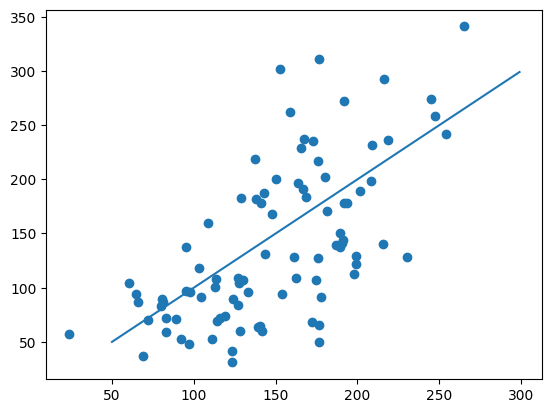

In [53]:
plt.scatter(y_pred,y_test)
x = np.arange(50,300,1)
y = x
plt.plot(x,y)
plt.show()

One of the assumptions of the Linear Regression is homoscedasticity of error terms. From the above graph we can see that error term is having a costant variance. 

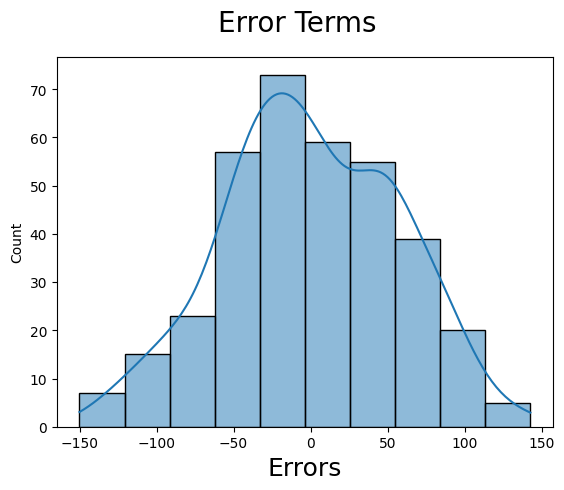

In [56]:
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 10, kde= True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()                                                  # X-label

Another assumption of the Linear Regression is error term should be normally distributed with zero mean. From the above plot we can see that the model is following that property